# Classic - LeNet

In [3]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

## Prepare the data

In [4]:
#load the MNIST dataset from keras datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Process data
X_train = X_train.reshape(-1, 28, 28, 1) # Expend dimension for 1 cahnnel image
X_test = X_test.reshape(-1, 28, 28, 1)  # Expend dimension for 1 cahnnel image
X_train = X_train / 255 # Normalize
X_test = X_test / 255 # Normalize

#One hot encoding
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

## Define the model

In [5]:
#Build LetNet model with Keras
def LetNet(width, height, depth, classes):
    # initialize the model
    model = Sequential()

    # first layer, convolution and pooling
    model.add(Conv2D(input_shape=(width, height, depth), 
                     kernel_size=(5, 5), filters=6, strides=(1,1), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # second layer, convolution and pooling
    model.add(Conv2D(input_shape=(width, height, depth), 
                     kernel_size=(5, 5), filters=16, strides=(1,1), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Fully connection layer
    model.add(Flatten())
    model.add(Dense(120,activation = 'tanh'))
    model.add(Dense(84,activation = 'tanh'))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model

LetNet_model = LetNet(28,28,1,10)
LetNet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_7 (Dense)              (None, 84)               

## Training and Fit

In [6]:
LetNet_model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
                     loss = 'categorical_crossentropy',
                     metrics=['accuracy'])

#Strat training
History = LetNet_model.fit(X_train, y_train, 
                           epochs=5, 
                           batch_size=32,
                           validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3596 - accuracy: 0.8943 - val_loss: 0.0600 - val_accuracy: 0.9822
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0651 - accuracy: 0.9802 - val_loss: 0.0580 - val_accuracy: 0.9805
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0417 - accuracy: 0.9878 - val_loss: 0.0548 - val_accuracy: 0.9822
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0333 - accuracy: 0.9899 - val_loss: 0.0390 - val_accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0251 - accuracy: 0.9925 - val_loss: 0.0452 - val_accuracy: 0.9859


## Plot the training history (Valiadation on test data)

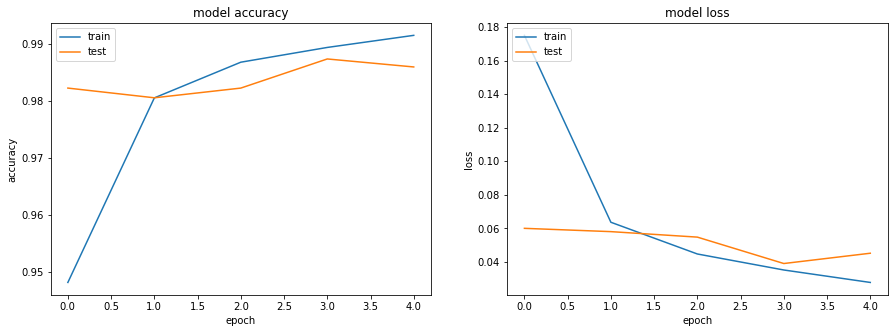

In [9]:
#Plot Loss and accuracy
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()